# LOGISTICS Classification

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


## COST FUNCTION

$$cost(W,b) = \frac{1}{m}\sum_{i=1}^m \left( H \left( x^\left( i \right) \right) - y^\left( i \right)\right)^2 \text{ When } H\left( x \right) = Wx + b $$ 

## Sigmoid Function

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

## Hypothesis after applying Sigmoid

$$ H(x) = \frac{1}{1+ e^{-W^TX}}$$ 

## Cost Function
$$ cost(H(x), y) = \frac{1}{m}\sum c(H(x),y)$$

$$ c(H(x), y) = \begin{cases} -log(H(x)) \text{  :  } y=1 \\ -log(1-H(x)) \text{  :  } y=0 \end{cases} $$

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
    for feature in features:
        column_names.append(feature + "_" + attr)

In [3]:
import pandas as pd
dataset = pd.read_csv(url, names=column_names)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
train_dataset = dataset.sample(frac=0.75, random_state=1)
len(train_dataset)


427

In [5]:
test_dataset = dataset.drop(train_dataset.index)
len(test_dataset)

142

In [6]:
# The `id` column can be dropped since each row is unique
x_train, y_train = train_dataset.iloc[:, 2:], train_dataset.iloc[:, 1]
x_test, y_test = test_dataset.iloc[:, 2:], test_dataset.iloc[:, 1]

In [7]:
import tensorflow as tf
y_train, y_test = y_train.map({'B': 0, 'M': 1}), y_test.map({'B': 0, 'M': 1})
x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

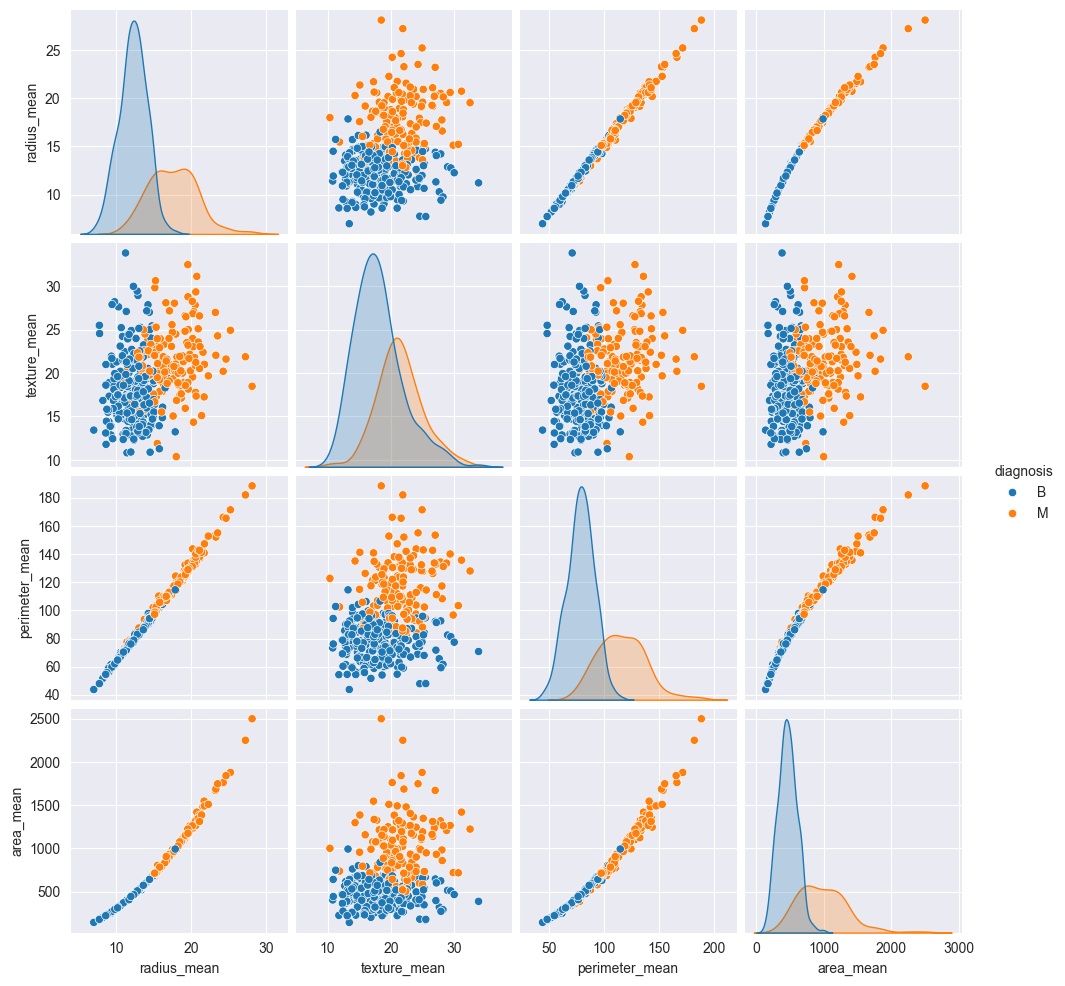

In [8]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(train_dataset.iloc[:, 1:6], hue = 'diagnosis', diag_kind='kde');

In [9]:
train_dataset.describe().transpose()[:10]

,count,mean,std,min,25%,50%,75%,max
id,427.0,2.756014e+07,1.162735e+08,8670.00000,865427.500000,905539.00000,8.810829e+06,9.113205e+08
radius_mean,427.0,1.414331e+01,3.528717e+00,6.98100,11.695000,13.43000,1.594000e+01,2.811000e+01
texture_mean,427.0,1.924468e+01,4.113131e+00,10.38000,16.330000,18.84000,2.168000e+01,3.381000e+01
perimeter_mean,427.0,9.206759e+01,2.431431e+01,43.79000,75.235000,86.87000,1.060000e+02,1.885000e+02
area_mean,427.0,6.563190e+02,3.489106e+02,143.50000,420.050000,553.50000,7.908500e+02,2.499000e+03
smoothness_mean,427.0,9.633618e-02,1.436820e-02,0.05263,0.085850,0.09566,1.050000e-01,1.634000e-01
compactness_mean,427.0,1.036597e-01,5.351893e-02,0.02344,0.063515,0.09182,1.296500e-01,3.454000e-01
concavity_mean,427.0,8.833008e-02,7.965884e-02,0.00000,0.029570,0.05999,1.297500e-01,4.268000e-01
concave_poinits_mean,427.0,4.872688e-02,3.853594e-02,0.00000,0.019650,0.03390,7.409500e-02,2.012000e-01
symmetry_mean,427.0,1.804597e-01,2.637837e-02,0.12030,0.161700,0.17840,1.947000e-01,2.906000e-01


In [10]:
class Normalize(tf.Module):
    def __init__(self, x):
        # Initialize the mean and standard deviation for normalization
        super().__init__()
        self.mean = tf.Variable(tf.math.reduce_mean(x, axis=0))
        self.std = tf.Variable(tf.math.reduce_std(x, axis=0))

    def norm(self, x):
        # Normalize the input
        return (x - self.mean)/self.std

    def denorm(self, x):
        # Denormalize the input
        return (x * self.std) + self.mean

norm_x = Normalize(x_train)
x_train_norm, x_test_norm = norm_x.norm(x_train), norm_x.norm(x_test)

## Logistic regression fundamentals
Linear regression returns a linear combination of its inputs; this output is unbounded. The output of a logistic regression is in the (0, 1) range. Let Y denote the probability of being in class 1 (the tumor is malignant). The desired mapping can be achieved by interpreting the linear regression output as the log odds ratio of being in class 1 as opposed to class 0:

$$ ln\left( \frac{Y}{1-Y} \right) = wX + b $$

when $ wX + b = z $ his equation can then be solved for Y
$$ Y = \frac{e^z}{1+e^z} = \frac{1}{1 + e^{-z} } $$

In high-dimensional feature matrix:
$$ Y = \sigma(Xw + b) $$

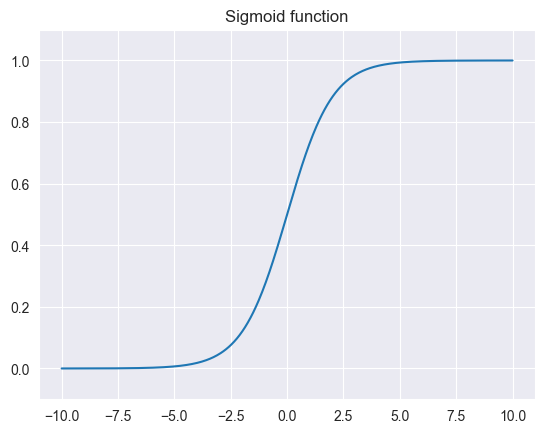

In [11]:
x = tf.linspace(-10, 10, 500)
x = tf.cast(x, tf.float32)
f = lambda x : (1/20)*x + 0.6
plt.plot(x, tf.math.sigmoid(x))
plt.ylim((-0.1,1.1))
plt.title("Sigmoid function");

## The log loss function
The log loss, or binary cross-entropy loss, is the ideal loss function for a binary classification problem with logistic regression

$$ L = - \frac{1}{m} \sum_{i=1}^m y_i \cdot  log(\hat{y}_i) + (1-y_i) \cdot log(1-\hat{y}_i) $$
where:
- $\hat{y}$: a vector of predicted probabilities
- $ y $: a vector of true targets

use the tf.nn.sigmoid_cross_entropy_with_logits function

In [12]:
def log_loss(y_pred, y):
    # Compute the log loss function
    ce = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_pred)
    return tf.reduce_mean(ce)

## The gradient descent update rule
recall that each $\hat{y}_i$ can be rewritten in terms of the inputs as $\sigma(X_iw+b)$

The goal is to find a $w*$ and $b*$ that minimize the log loss
$$ L = - \frac{1}{m} \sum_{i=1}^m y_i \cdot log(\sigma(X_iw+b)) + (1-y_i)\cdot log(1-\sigma(X_iw+b))  $$
By taking the gradient $L$ with respect to $w$
$$ \frac{\delta{L}}{\delta{w}} = \frac{1}{m}(\sigma(Xw+b)-y)X $$
By taking the gradient $L$ with respect to $b$
$$ \frac{\delta{L}}{\delta{b}} = \frac{1}{m}\sum_{i=1}^m \sigma(X_iw+b) - y_i $$

In [13]:
class LogisticRegression(tf.Module):

    def __init__(self):
        super().__init__()
        self.built = False

    def __call__(self, x, train=True):
        # Initialize the model parameters on the first call
        if not self.built:
            # Randomly generate the weights and the bias term
            rand_w = tf.random.uniform(shape=[x.shape[-1], 1], seed=22)
            rand_b = tf.random.uniform(shape=[], seed=22)
            self.w = tf.Variable(rand_w)
            self.b = tf.Variable(rand_b)
            self.built = True
        # Compute the model output
        z = tf.add(tf.matmul(x, self.w), self.b)
        z = tf.squeeze(z, axis=1)
        if train:
            return z
        return tf.sigmoid(z)

In [14]:
log_reg = LogisticRegression()
y_pred = log_reg(x_train_norm[:5], train=False)
y_pred.numpy()

array([0.99907416, 0.9865949 , 0.03465715, 0.10381234, 0.4773758 ],
      dtype=float32)

In [15]:
def predict_class(y_pred, thresh=0.5):
    # Return a tensor with  `1` if `y_pred` > `0.5`, and `0` otherwise
    return tf.cast(y_pred > thresh, tf.float32)

def accuracy(y_pred, y):
    # Return the proportion of matches between `y_pred` and `y`
    y_pred = tf.math.sigmoid(y_pred)
    y_pred_class = predict_class(y_pred)
    check_equal = tf.cast(y_pred_class == y,tf.float32)
    acc_val = tf.reduce_mean(check_equal)
    return acc_val

## Train the model
Using mini-batches for training provides both memory efficiency and faster convergence

In [16]:
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train))
train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_norm, y_test))
test_dataset = test_dataset.shuffle(buffer_size=x_test.shape[0]).batch(batch_size)

In [17]:
# Set training parameters
epochs = 200
learning_rate = 0.01
train_losses, test_losses = [], []
train_accs, test_accs = [], []

# Set up the training loop and begin training
for epoch in range(epochs):
    batch_losses_train, batch_accs_train = [], []
    batch_losses_test, batch_accs_test = [], []

    # Iterate over the training data
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            y_pred_batch = log_reg(x_batch)
            batch_loss = log_loss(y_pred_batch, y_batch)
        batch_acc = accuracy(y_pred_batch, y_batch)
        # Update the parameters with respect to the gradient calculations
        grads = tape.gradient(batch_loss, log_reg.variables)
        for g,v in zip(grads, log_reg.variables):
            v.assign_sub(learning_rate * g)
        # Keep track of batch-level training performance
        batch_losses_train.append(batch_loss)
        batch_accs_train.append(batch_acc)

    # Iterate over the testing data
    for x_batch, y_batch in test_dataset:
        y_pred_batch = log_reg(x_batch)
        batch_loss = log_loss(y_pred_batch, y_batch)
        batch_acc = accuracy(y_pred_batch, y_batch)
        # Keep track of batch-level testing performance
        batch_losses_test.append(batch_loss)
        batch_accs_test.append(batch_acc)

    # Keep track of epoch-level model performance
    train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
    test_loss, test_acc = tf.reduce_mean(batch_losses_test), tf.reduce_mean(batch_accs_test)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    if epoch % 20 == 0:
        print(f"Epoch: {epoch}, Training log loss: {train_loss:.3f}")

Epoch: 0, Training log loss: 0.591
Epoch: 20, Training log loss: 0.405
Epoch: 40, Training log loss: 0.284
Epoch: 60, Training log loss: 0.209
Epoch: 80, Training log loss: 0.153
Epoch: 100, Training log loss: 0.120
Epoch: 120, Training log loss: 0.105
Epoch: 140, Training log loss: 0.095
Epoch: 160, Training log loss: 0.087
Epoch: 180, Training log loss: 0.089


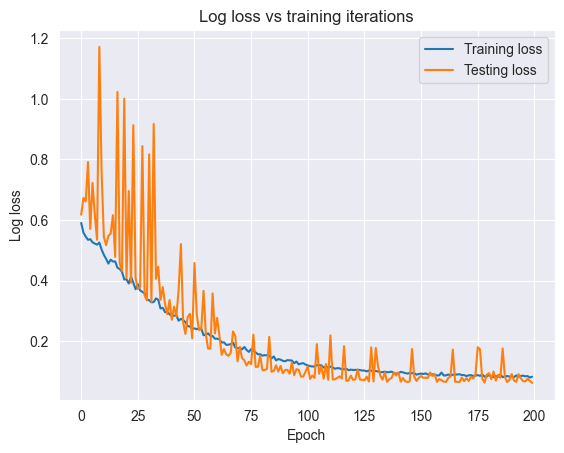

In [18]:
plt.plot(range(epochs), train_losses, label = "Training loss")
plt.plot(range(epochs), test_losses, label = "Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.legend()
plt.title("Log loss vs training iterations");

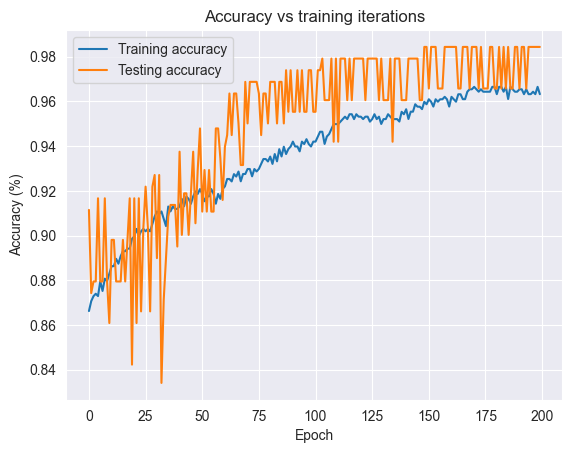

In [19]:
plt.plot(range(epochs), train_accs, label = "Training accuracy")
plt.plot(range(epochs), test_accs, label = "Testing accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy vs training iterations");

In [21]:
print(f"Final training log loss: {train_losses[-1]:.3f}")
print(f"Final testing log Loss: {test_losses[-1]:.3f}")
print(f"Final training accuracy: {train_accs[-1]:.3f}")
print(f"Final testing accuracy: {test_accs[-1]:.3f}")

Final training log loss: 0.083
Final testing log Loss: 0.063
Final training accuracy: 0.963
Final testing accuracy: 0.984
